In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score




# Load Data
df = pd.read_csv('../data/processed_data.csv')
# Use only features for clustering (exclude targets)
X = df.drop(columns=['health_risk_level', 'health_risk_level_encoded', 'Health_Risk_Score'], errors='ignore')

print(f"Clustering Data Shape: {X.shape}")

Clustering Data Shape: (214, 55)


In [ ]:
# PCA (2-Components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.09160497 0.06017774]


In [ ]:
#   K - Means 
results = []
K_values = range(2, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X, labels)
    
    results.append({
        'K': k,
        'Inertia': round(inertia, 2),
        'Silhouette Score': round(sil_score, 4)
    })

results_df = pd.DataFrame(results)
display(results_df)
results_df.to_csv('../visuals/clustering_kstability.csv', index=False)

# Determine Best K (Highest Silhouette)
best_k = results_df.loc[results_df['Silhouette Score'].idxmax()]['K']
print(f"Best K based on Silhouette: {int(best_k)}")

,K,Inertia,Silhouette Score
0,2,11006.83,0.0750
1,3,10532.80,0.0686
2,4,10107.26,0.0680
3,5,9893.24,0.0451
4,6,9386.62,0.0639
5,7,9079.48,0.0560
6,8,8942.40,0.0673
7,9,8609.15,0.0615
8,10,8493.38,0.0629


Best K based on Silhouette: 2


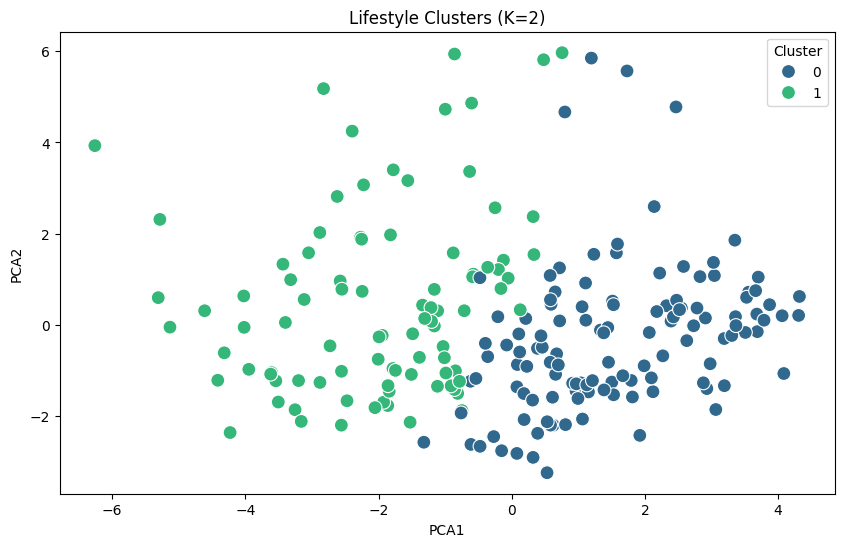

Clustering plot saved to ../visuals/clustering_pca_plot.png


In [5]:
# Final Clustering & Visualization

# Fit Final K-Means
final_k = int(best_k)
kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X)

df_pca['Cluster'] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title(f'Lifestyle Clusters (K={final_k})')
plt.savefig('../visuals/clustering_pca_plot.png')
plt.show()

print("Clustering plot saved to ../visuals/clustering_pca_plot.png")